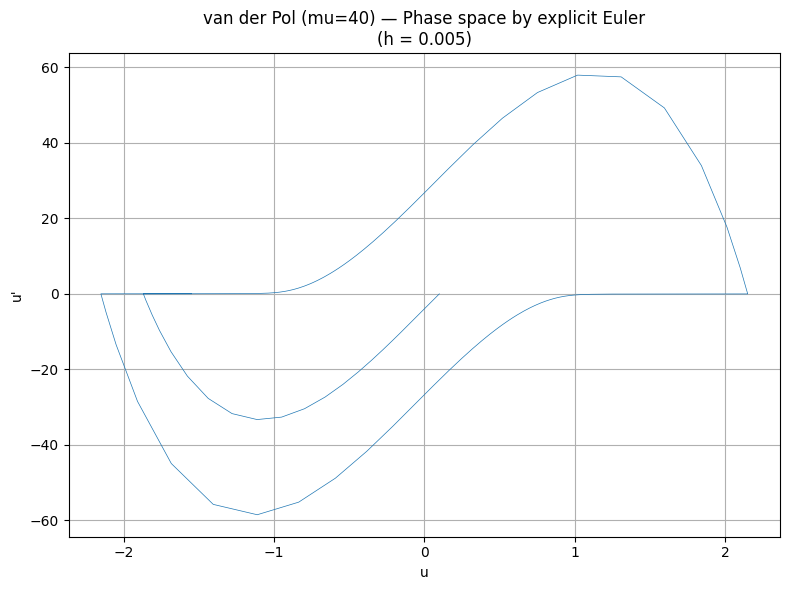

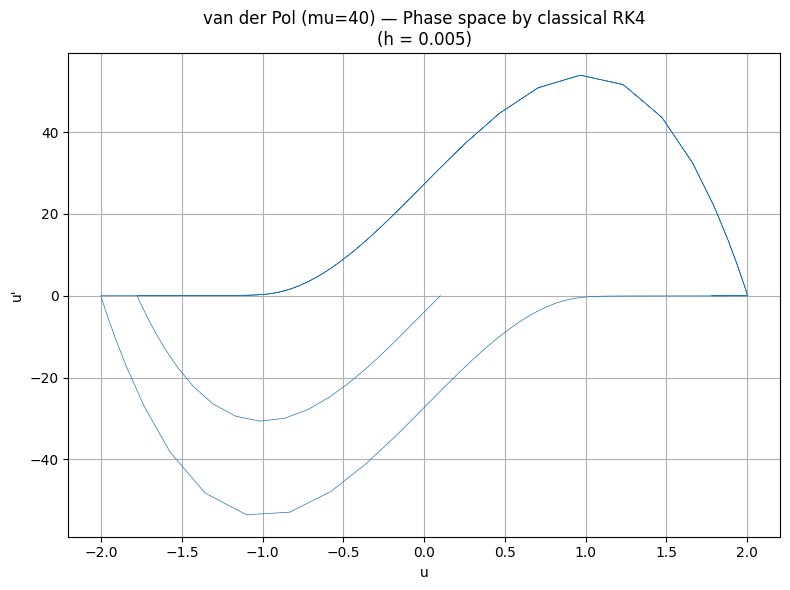

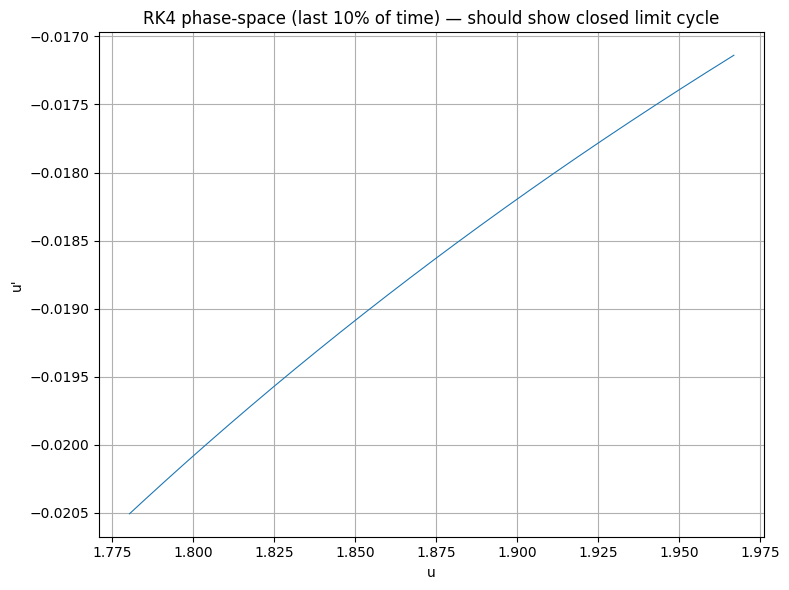

Integration finished. Step size h = 0.005 Number of steps = 20000
Final state RK4: [ 1.78035253 -0.02050901]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mu = 40.0  
def vdp_rhs(t, y):
    # y = [u, v] with v = u'
    u, v = y
    du = v
    dv = mu * (1 - u**2) * v - u
    return np.array([du, dv])

def explicit_euler(rhs, t0, y0, h, nsteps):
    ys = np.empty((nsteps+1, len(y0)))
    ts = np.empty(nsteps+1)
    ys[0] = y0
    ts[0] = t0
    y = y0.copy()
    t = t0
    for n in range(nsteps):
        y = y + h * rhs(t, y)
        t = t + h
        ys[n+1] = y
        ts[n+1] = t
    return ts, ys

def rk4(rhs, t0, y0, h, nsteps):
    ys = np.empty((nsteps+1, len(y0)))
    ts = np.empty(nsteps+1)
    ys[0] = y0
    ts[0] = t0
    y = y0.copy()
    t = t0
    for n in range(nsteps):
        k1 = rhs(t, y)
        k2 = rhs(t + 0.5*h, y + 0.5*h*k1)
        k3 = rhs(t + 0.5*h, y + 0.5*h*k2)
        k4 = rhs(t + h, y + h*k3)
        y = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        t = t + h
        ys[n+1] = y
        ts[n+1] = t
    return ts, ys

t0 = 0.0
T = 100.0
y0 = np.array([0.1, 0.0])  

h = 0.005  
nsteps = int(T / h)


ts_e, ys_e = explicit_euler(vdp_rhs, t0, y0, h, nsteps)
ts_rk, ys_rk = rk4(vdp_rhs, t0, y0, h, nsteps)


u_e, v_e = ys_e[:,0], ys_e[:,1]
u_rk, v_rk = ys_rk[:,0], ys_rk[:,1]

# Plot phase space for explicit Euler
plt.figure(figsize=(8,6))
plt.plot(u_e, v_e, linewidth=0.5)  
plt.title('van der Pol (mu=40) — Phase space by explicit Euler\n(h = {})'.format(h))
plt.xlabel('u')
plt.ylabel("u'")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot phase space for classical RK4
plt.figure(figsize=(8,6))
plt.plot(u_rk, v_rk, linewidth=0.5)
plt.title('van der Pol (mu=40) — Phase space by classical RK4\n(h = {})'.format(h))
plt.xlabel('u')
plt.ylabel("u'")
plt.grid(True)
plt.tight_layout()
plt.show()

# Additionally, plot a short-time zoom of RK4 phase around steady cycle to show closure (last 10% of time)
start_idx = int(0.90 * len(u_rk))
plt.figure(figsize=(8,6))
plt.plot(u_rk[start_idx:], v_rk[start_idx:], linewidth=0.8)
plt.title('RK4 phase-space (last 10% of time) — should show closed limit cycle')
plt.xlabel('u')
plt.ylabel("u'")
plt.grid(True)
plt.tight_layout()
plt.show()

# Report simple summary statistics
print("Integration finished. Step size h =", h, "Number of steps =", nsteps)
print("Final state RK4:", ys_rk[-1])

